In [1]:
import os
import numpy as np

In [2]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [3]:
old_data = list(data)
old_labels = list(labels)

In [4]:
maxv = 0
for i in range(0,data.shape[0]):
    if(data[i].shape[0] > maxv):
        maxv = data[i].shape[0]
print(maxv)
minv = 100000000
for i in range(0,data.shape[0]):
    if(data[i].shape[0] < minv):
        minv = data[i].shape[0]
print(minv)

7666344
31009


In [5]:
window_size = 11250
data = []
labels = []
for data_i in range(0,len(old_data)):
    num_folds = int(len(old_data[data_i])/window_size)
    for folds_i in range(0,num_folds):
        data.append(old_data[data_i][window_size*folds_i:window_size*(folds_i+1)])
        labels.append(old_labels[data_i])

In [6]:
data

[array([ 0.0473018 ,  0.12854484,  0.20001151, ..., -0.29693666,
        -0.22780095, -0.14802177], dtype=float32),
 array([-0.08122302, -0.02213345,  0.01783158, ..., -0.00398693,
         0.01232085,  0.02345323], dtype=float32),
 array([ 0.06067781,  0.11352027,  0.14782667, ..., -0.06832504,
        -0.05882888, -0.04612105], dtype=float32),
 array([-0.04673661, -0.05199378, -0.03857807, ...,  0.10988712,
         0.04620286, -0.02960546], dtype=float32),
 array([-0.10212803, -0.16247207, -0.21591005, ...,  0.06761285,
         0.06696755,  0.06003542], dtype=float32),
 array([ 0.03771452,  0.0093366 ,  0.01116384, ...,  0.17478865,
         0.18181254,  0.1616852 ], dtype=float32),
 array([ 0.13277805,  0.1120715 ,  0.07242686, ...,  0.14050089,
         0.11957565,  0.10774125], dtype=float32),
 array([ 0.07554922,  0.02190064, -0.02457524, ...,  0.02705816,
         0.0667835 ,  0.07945011], dtype=float32),
 array([ 0.0947172 ,  0.09824793,  0.09849041, ...,  0.18086277,
       

In [7]:
data = np.array(data)
labels = np.array(labels)
print(data.shape,labels.shape)

(4752, 11250) (4752,)


In [8]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels_encoded = onehot_encoder.fit_transform(integer_encoded)
print(labels_encoded)

[2 2 2 ..., 1 1 1]
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 ..., 
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]]


In [9]:
labels_encoded = np.array(labels_encoded)

In [10]:
from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten
from keras.optimizers import RMSprop , adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [11]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels_encoded,test_size=0.1,random_state=3)

c:\programdata\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4276, 11250) (4276, 5)
(476, 11250) (476, 5)


In [13]:
def cnn_model ():
    
    model = Sequential ()
    model.add(Conv1D(input_shape = (x_train.shape[1], 1), filters = 32, kernel_size = 256, activation = 'relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters = 16, kernel_size = 128, activation = 'relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add( Dense(16, activation = 'relu', init='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation ='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

    model.summary()
    return model

In [14]:
ann = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10995, 32)         8224      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5370, 16)          65552     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2685, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 42960)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                687376    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
__________

c:\programdata\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="normal")`
  if __name__ == '__main__':


In [15]:
from numpy import newaxis
#featopen = featopen*100
#featlabelopen = featlabelopen*100
x_train = x_train[:,:,newaxis]
print(x_train.shape)
x_test = x_test[:,:,newaxis]
print(x_test.shape)

(4276, 11250, 1)
(476, 11250, 1)


In [16]:
history =  ann.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25,batch_size=64)

Train on 4276 samples, validate on 476 samples
Epoch 1/25
4276/4276 [==============================] - 90s - loss: 0.9955 - acc: 0.6819 - val_loss: 0.8160 - val_acc: 0.6639
Epoch 2/25
4276/4276 [==============================] - 91s - loss: 0.6815 - acc: 0.7217 - val_loss: 0.6795 - val_acc: 0.7248
Epoch 3/25
4276/4276 [==============================] - 96s - loss: 0.6001 - acc: 0.7491 - val_loss: 0.6072 - val_acc: 0.7668
Epoch 4/25
4276/4276 [==============================] - 100s - loss: 0.5542 - acc: 0.7608 - val_loss: 0.5066 - val_acc: 0.7983
Epoch 5/25
4276/4276 [==============================] - 100s - loss: 0.4987 - acc: 0.7792 - val_loss: 0.7772 - val_acc: 0.5672
Epoch 6/25
4276/4276 [==============================] - 101s - loss: 0.4632 - acc: 0.7986 - val_loss: 0.5732 - val_acc: 0.7752
Epoch 7/25
4276/4276 [==============================] - 113s - loss: 0.4374 - acc: 0.8059 - val_loss: 0.4454 - val_acc: 0.8214
Epoch 8/25
4276/4276 [==============================] - 111s - loss

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


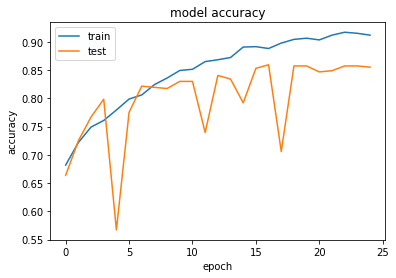

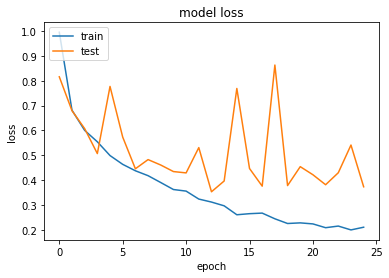

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()